# Using pre-trained Imagenet models
[Original url](https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/)

In [1]:
import keras
import numpy as np

Using TensorFlow backend.


## Load the models from keras applications folder

In [2]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 41s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 13s 1us/step


## Import the required image preprocessing functions

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
filename = 'Example_Image_Data/images/cat.jpg'

## Perform Pre-processing before feeding the image to the network

#### We perform the following pre-processing to the image

1. Keras loads the image using PIL library. This is done using the **load_img** function. The image is in width x height x channels format.
2. Convert the image from PIL format to Numpy format ( height x width x channels ) using **image_to_array** function.
3. Form a batch of image( s ) to feed the network. This is done using the **expand_dims** function in Numpy

PIL image size (224, 224)


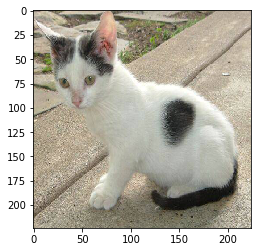

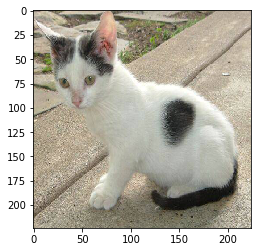

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


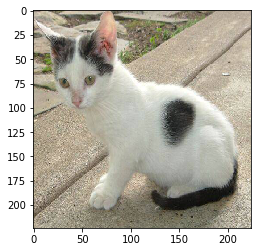

In [5]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Predictions using the various Network

1. Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet
2. get the probabilities of occurrence for each class
3. convert the probabilities to human-readable labels

### VGG16 Network

In [6]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

40960/35363 [==================================] - 0s 2us/step


[[('n02123597', 'Siamese_cat', 0.3093409),
  ('n01877812', 'wallaby', 0.08034124),
  ('n02326432', 'hare', 0.07509851),
  ('n02325366', 'wood_rabbit', 0.05053067),
  ('n03223299', 'doormat', 0.048173655)]]

### ResNet50 Network

In [7]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.17054991),
  ('n02123597', 'Siamese_cat', 0.12245715),
  ('n03958227', 'plastic_bag', 0.1174557)]]

### MobileNet Network

In [8]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n03958227', 'plastic_bag', 0.15703735),
  ('n02124075', 'Egyptian_cat', 0.11697447),
  ('n02123597', 'Siamese_cat', 0.10532668),
  ('n02123045', 'tabby', 0.075648665),
  ('n02909870', 'bucket', 0.054680943)]]

### Inception_V3 Network

+ The input size for inception network is different from the other networks. It accepts inputs of size (299, 299).
+ Thus we load the image with target size according to that.

In [9]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n02124075', 'Egyptian_cat', 0.6622588),
  ('n02123045', 'tabby', 0.050285105),
  ('n02123597', 'Siamese_cat', 0.036381565),
  ('n02123159', 'tiger_cat', 0.023522357),
  ('n03223299', 'doormat', 0.015205675)]]

In [12]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("./Example_Image_Data/images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

(-0.5, 699.5, 699.5, -0.5)

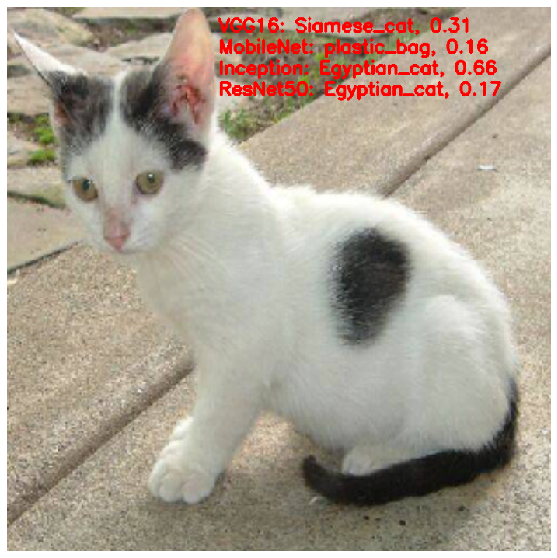

In [13]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')